<a href="https://colab.research.google.com/github/matthewlai12/ECE-Lab/blob/main/ECE447A1MatthewLai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 447 Assignment 1
## Matthew Lai 1703837

Useful imports

In [1]:
!pip install -U scikit-learn
!pip install -U scikit-plot
!pip uninstall -y scipy
!pip install --force-reinstall "scipy==1.11.4" --no-cache-dir

Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 240.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 212.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


## A1-1

Overfitting: Overfitting is when a model grabs the data it is being trained on as well as unwanted noise or fluctuations. This causes the model to be extremely accurate on its training data, but performs poorly on test data because it has been specified on the training data too far. An indicator of an overfit model is high variance and low bias

Underfitting: Underfitting is wehn a model does not capture the training data as well and becomes more generalized. This means that the model will perform poorly on both the training data as well as the test data. The model may seem extremely simple which may be corrected by more training time and more features.

Key Differences: We can identify many differences in terms of overfitting and underfitting. The first one is bias. We may see low bias on an underfit model as the model is very flexible, and high bias on an underfit model as it is too simplistic. Next we can look at variance. An overfit model will see high variance as the model is sensitive to small changes, and low variance in a underfit model as the model is changes little with variation. Looking at complexity we will see that overfit models have high complexity as it recognizes the noise as well as training data, and underfit models capture less complexity as it is simple. Training error tends to be low on an overfit model and high on an underfit model, while test error is high on both as overfit models are unable to make generalizations and underfit models cannot capture patterns well. Overall, overfit models will capture subtle patterns within the training set, and get lead to make irrelevant correlations. On the other hand underfit models will not capture any patterns and make ignore meaningful correlations within the data.

## A1-2

Correlation is a measure in which we are able to compare how linearly related variables are. We are able to see how variables change at a constant rate. We will use corr() from pandas to compute pairwise correlation between air quality and the other features.

In [2]:
import pandas as pd


data = pd.read_csv('./sample_data/data-Q2.csv')
df = pd.DataFrame(data)
df[df.columns[1:]].corr()['AIR_QUALITY']

,AIR_QUALITY
AIR_QUALITY,1.000000
GREEN_SPACE,-0.645739
RECYCLING,-0.082457
EMISSIONS,0.550593
RENEWABLE,-0.788313


From our generated output we get correlation values for air quality and the other features. We will classify the strength and the sign of the results individually.

- Between AIR_QUALITY and itself the correlation is obviously 1, as it is the same, but indicates a very strong positive correlation.
- GREEN_SPACE: -0.645739 indicates moderately strong negative correlation. This means that air quality index decreases as green space increases. In real terms this means the air quality is better when there is more greenspace
- RECYCLING: -0.082457 indicated a small negative correlation. This means that air quality index decreases slightly when recycling increases. In real terms this is a small change so it is hard to tell if recycling has an impact, or is maybe overlooked by other impacts
- EMMISIONS: 0.550593 indicates a moderately strong positive correlation. This means that as emmisions go up, so does the air quality index. In real terms this makes sense as air quality would be worse if there is more emmisions in the air.
- RENEWABLE: -0.788313 indicates a strong negative correlation. Air quality index will decrease as renewable sources increase. In real terms this means that the more renewable energy sources we have, the better the air quality will be.

## A1-3

### a)
Using a classification threshold of 0.65, and assuming that true is the positive target level
(at-risk customers who could leave), construct a confusion matrix for each of the models.
Use this threshold for the questions b) and c) below.

For the purpose of this assignment, we use the confusion matrix structure defined in sklearn as shown

[[TN, FP], [FN, TP]]

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score


# Read in sample data from file and set it as a pandas dataframe df
data = pd.read_csv('./sample_data/data-Q3.csv')
df =  pd.DataFrame(data)

# Map the target colomn to a bool
df['Target_Bin'] = df['Target'].map({True: 1, False: 0})

# Generate predictions with a threshold of 0.65
threshold = 0.65
df['Predicted_Model1'] = (df['Model_1_Score'] >= threshold).astype(int)
df['Predicted_Model2'] = (df['Model_2_Score'] >= threshold).astype(int)


# Here we build our confusion matrix
y_true = df['Target_Bin']

# Model 1
y_pred_model1 = df['Predicted_Model1']
cm_model1 = confusion_matrix(y_true, y_pred_model1)
print("Confusion Matrix - Model 1:")
print(cm_model1)

# Model 2
y_pred_model2 = df['Predicted_Model2']
cm_model2 = confusion_matrix(y_true, y_pred_model2)
print("\nConfusion Matrix - Model 2:")
print(cm_model2)

Confusion Matrix - Model 1:
[[21  3]
 [ 9 17]]

Confusion Matrix - Model 2:
[[17  7]
 [ 0 26]]


### b)

Calculate the simple accuracy and average class accuracy (using a harmonic mean) for each model

Using accuracy = (TP+TN) / (TP+TN+FP+FN)

In [4]:
accuracy_model1 = accuracy_score(df['Target_Bin'], df['Predicted_Model1'])
accuracy_model2 = accuracy_score(df['Target_Bin'], df['Predicted_Model2'])

print(f"Simple Accuracy - Model 1: {accuracy_model1} => {accuracy_model1*100}%")
print(f"Simple Accuracy - Model 2: {accuracy_model2} => {accuracy_model2*100}%")

Simple Accuracy - Model 1: 0.76 => 76.0%
Simple Accuracy - Model 2: 0.86 => 86.0%


Now we calculate average class accuracy via harmonic mean

ACA(HM) = 1/((1/levels)*(sum of recalls))

where levels = {A, B} = 2
and recall = TP / (TP+FN)

for model 1:

recall = 17/26, 21/24

for model 2:

recall = 26/26, 17/24

Model 1 ACA(HM) = 1/((1/2)*((1/(17/26))+(1/(21/24))) = 0.7484 = 74.84%

Model 2 ACA(HM) = 1/((1/2)*(1+(1/(17/24))) = 0.8292 = 82.92%

### c)
Based on the average class accuracy measures, which model appears to perform best at this task?

From our results, we are able to say that model 2 performed better as it had the higher average class accuracy at 82.92% compared to 74.84%

### d)

Generate an accumulative gain chart for each model

Model 1 Accumalative Gain Chart:
Model 2 Accumulative Gain Chart:


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

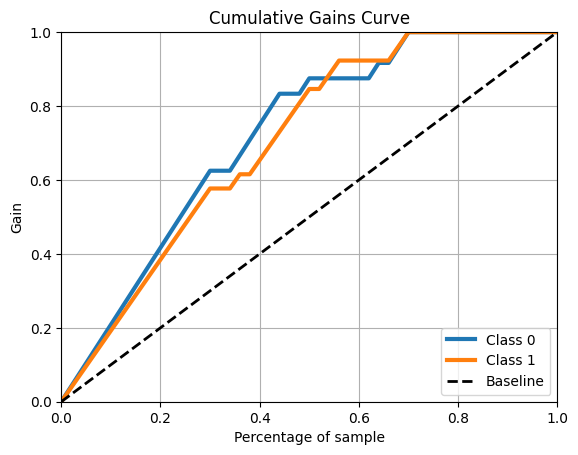

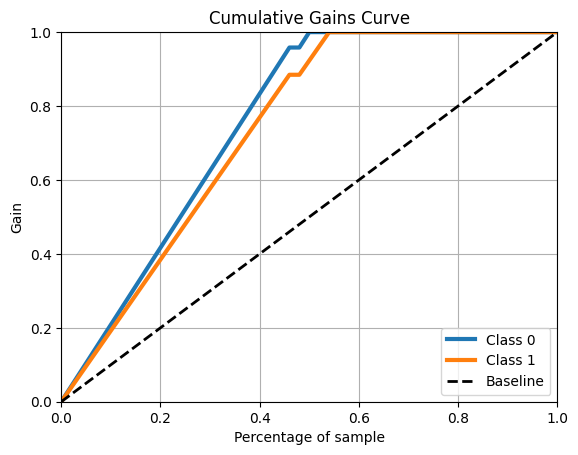

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt

y_true = df['Target_Bin']
y_score_model1 = df['Model_1_Score']
y_score_model2 = df['Model_2_Score']

# Stack the negative-class probability and positive-class probability as columns
y_probas_model1 = np.column_stack([1 - y_score_model1, y_score_model1])
y_probas_model2 = np.column_stack([1 - y_score_model2, y_score_model2])

print("Model 1 Accumalative Gain Chart:")
skplt.metrics.plot_cumulative_gain(y_true, y_probas_model1)

print("Model 2 Accumulative Gain Chart:")
skplt.metrics.plot_cumulative_gain(y_true, y_probas_model2)

### e)

The company for which the model is being built has enough money to send a mailshot to only the top
40% of its contact list. Based on the cumulative gain chart generated in the previous part, would you
recommend that Model 1 or Model 2 would perform best for the company?


We would want to recommend model 2 for the company. The reason for this is that at the top 40% mark or x=0.6+, we see that the cumalalitve gains is at 1, while for model one is at about 0.9. Model 2 has a larger fraction of true positives.

### f)

Generate precision-recall curves for each model.

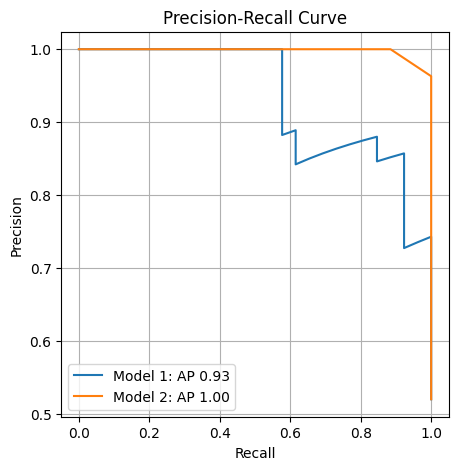

In [6]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision and recall computation
precision1, recall1, thresholds1 = precision_recall_curve(y_true, y_score_model1)
precision2, recall2, thresholds2 = precision_recall_curve(y_true, y_score_model2)

# Average precision score
average_precision1 = average_precision_score(y_true, y_score_model1)
average_precision2 = average_precision_score(y_true, y_score_model2)

# Plotting
plt.figure(figsize=(5, 5))
plt.plot(recall1, precision1, label='Model 1: AP {0:0.2f}'.format(average_precision1))
plt.plot(recall2, precision2, label='Model 2: AP {0:0.2f}'.format(average_precision2))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

### g)

Generate ROC curves for each model.

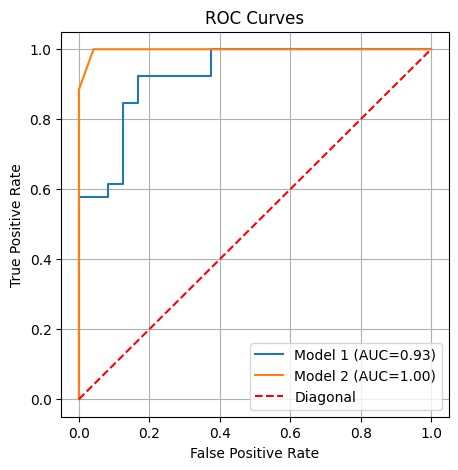

In [7]:
from sklearn.metrics import roc_curve, auc

# FPR, TPR, and AUC per model
fpr1, tpr1, thresholds1 = roc_curve(y_true, y_score_model1)
fpr2, tpr2, thresholds2 = roc_curve(y_true, y_score_model2)
auc_model1 = auc(fpr1, tpr1)
auc_model2 = auc(fpr2, tpr2)

# Plotting Curves
plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1, label=f"Model 1 (AUC={auc_model1:.2f})")
plt.plot(fpr2, tpr2, label=f"Model 2 (AUC={auc_model2:.2f})")

# Plot a diagonal line
plt.plot([0, 1], [0, 1], 'r--', label="Diagonal")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

### h)

Please compare precision-recall curves to ROC.

Precision-recall curves are used to calculate performance by plotting precision against recall. Used best when classes are imbalenced showing performance accross many thresholds. We use a PR curve when we want to find as many positive instances as we can while keeping false positves low.

ROC is used to calculate performance by plotting TPR against the FPR. The area under the curve helps us distinguish positives from negatives across all thresholds. We would use an ROC curve when our classes are more balanced.

There is a difference in the interpretation between an ROC curve and PR curve. A ROC curve will tell us how classes are serperated overall, while a PR curve how many predicted positives are correct.